## Elementarströmungen

Durch die Linearität der Laplace-Gleichung lassen sich Lösungen dieser Differentialgleichung, also Lösungen von Potentialströmungen, linear überlagern. Es ist also sinnvoll, sich zunächst einfache elementare Strömungen genauer anzuschauen, die dann später zu komplexeren Strömungen bis hin zu beliebigen Profilumströmungen überlagern lassen.

### Translationsströmung (homogene Strömung)

Die einfachste dieser Elementarströmungen ist die Translationsströmung oder auch homogene Strömung, bei der alle Geschwindigkeitsvektoren in die gleiche Richtung zeigen:

$$
\overrightarrow{v}
=
\begin{pmatrix}
    u_1 \\
    v_1 \\
\end{pmatrix} = const.$$

![](translationsstroemung.pdf)

Da mit der Definition des Potentials

$$u=\frac{\partial \phi}{\partial x} \qquad \text{und} \qquad v=\frac{\partial \phi}{\partial y}$$

erhält man die Potentialfunktion durch Integration von $u$ und $v$:

$$\phi = u_1~x + c(y) \qquad \text{und} \qquad \phi = u_2~y + c(x)$$

durch Vergleich der beiden letzten Gleichungen wird klar, dass die "Integrationskonstanten" $c(x) = u_1 x$ und $c(y) = u_2 y$ sein müssen. Damit ist die Potentialfunktion der Translationsströmung:

$$\phi = u_1~x + u_2~y$$

Mit der gleichen Vorgehensweise erhält man auch die Stromfunktion:

$$\psi = -u_2~x + u_1~y$$

Die letzte Gleichung kann umgeformt werden, um eine Gleichung für die Stromlinie zu erhalten:

$$y(x) = \frac{\psi}{u_1} + \frac{u_2}{u_1}x$$

### Quellen- und Senkenströmung

Unter einer Quellen- oder Senkenströmung versteht man die radiale Strömung aus einer Quelle oder in eine Senke, die im Ursprung des Koordinatensystems liegt.

![](quellenstroemung.pdf)

Im Falle einer Quellenströmung zeigen die Geschwindigkeitsvektoren alle radial vom Ursprung der Quelle weg. Der Betrag der Geschwindigkeit nimmt mit zunehmendem Abstand ab, da sich der Volumenstrom $Q$ (in 2D der Volumenstrom pro Tiefeneinheit, damit die Einheiten stimmen), der aus dem Ursprung austritt auf eine immer größere Kreisfläche verteilt. In Polarkoordinaten folgt dann für den Geschwindigkeitsvektor, der immer in radialer Richtung zeigt:

$$\overrightarrow{v} = \frac{Q}{2\pi r} 
\begin{pmatrix}
1 \\
0
\end{pmatrix}_{r,\phi}$$

Dabei handelt es sich für positive Werte von $Q$ um eine Quelle und für negative Werte um eine Senke. In kartesischen Koordinaten wird mit $r=\sqrt{x^2+y^2}$ daraus:

$$\overrightarrow{v} = \frac{Q}{2\pi\left(x^2+y^2\right)}
\begin{pmatrix}
x \\
y
\end{pmatrix}_{x,y}$$

Durch Integration von

$$\frac{\partial \phi}{\partial x} = u = \frac{Q}{2\pi} \frac{x}{x^2+y^2}$$
und 
$$\frac{\partial \phi}{\partial y} = v = \frac{Q}{2\pi} \frac{y}{x^2+y^2}$$

findet man - wie bei der Translationsströmung - die Potentialfunktion

$$\phi = \frac{Q}{2\pi} \text{ln} \sqrt{x^2+y^2} + c(y)$$

$$\phi = \frac{Q}{2\pi} \text{ln} \sqrt{x^2+y^2} + c(x)$$

Durch Vergleich der beiden Gleichungen wird klar, dass die beiden Integrationskonstanten $c(x)$ und $c(y)$ gerade Null sind. Wenn wir nun noch berücksichtigen, dass die Quellen- oder Senkenströmung nicht im Koordinatenursprung liegen muss, sondern allgemein an der Stelle $(x_s, y_s)$, wird die Potentialfunktion:

$$\phi = \frac{Q}{2\pi} \text{ln} \sqrt{(x-x_s)^2+(y-y_s)^2}$$

Analog dazu ergibt sich durch Integration von $\partial \psi/ \partial x = -v$ und $\partial \psi / \partial y = u$ die Stromfunktion der Quellen-/Senkenströmung:

$$\psi = \frac{Q}{2\pi} \text{arctan} \frac{y-y_s}{x-x_s}$$

#### Beispiel 1

Als erstes Beispiel soll eine Quellen- und eine Senkenströmung, die in einem Abstand zueinander angeordnet sind überlagert werden. Das Resultat soll mit der Matplotlib visualisiert werden.

Als erstes importieren wir hierzu die benötigten Bibliotheken:

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Die $x,y$-Ebene, in der wir die Strömung visualisieren wollen, soll sich von (-5,-5) bis (15,5) erstrecken. Die Quelle positionieren wir bei (0,0) und die Senke bei (10,0) und geben ihnen jeweils einen Volumenstrom pro Tiefeneinheit von $2~\text{m}^2/\text{s}$ bzw. $-2~\text{m}^2/\text{s}$.

Als Variablen benötigen wir die $x$- und $y$-Koordinaten, an denen die Geschwindigkeitskomponenten und die Potential- und Stromfunktionen ausgewertet werden sollen:

In [56]:
nx = 40                               # Anzahl der Punkte in x-Richtung
ny = 20                               # Anzahl der Punkte in y-Richtung
x = np.linspace(-5, 15, nx)           # 1D-Array mit x-Koordinaten
y = np.linspace(-5,  5, ny)           # 1D-Array mit y-Koordinaten

X, Y = np.meshgrid(x, y)              # erzeugt das Gitter mit nx * ny Punkten

Für die Geschwindigkeit und die Potential- und Stromfunktionen der Quellenströmung definieren wir jeweils eigene Funktionen:

In [57]:
def source_v(x, y, xs, ys, Q):        # der Geschwindigkeitsvek. der Quellenstr.
    s = Q/(2*math.pi) / ((x-xs)**2+(y-ys)**2)
    return s*(x-xs), s*(y-ys)

def source_psi(x, y, xs, ys, Q):      # die Stromfunktion der Quellenströmung
    return Q/(2*math.pi)*np.arctan((y-ys)/(x-xs)) 
        
def source_phi(x, y, xs, ys, Q):      # die Potentialfunktion der Quellenströmung
    return Q/(2*math.pi)*np.log(np.sqrt((x-xs)**2+(y-ys)**2))

Die Visualisierung der Stromlinien kann auf verschiedene Art und Weise erfolgen:

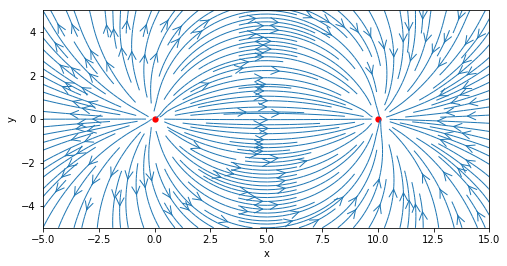

In [58]:
u_quelle, v_quelle = source_v(X, Y, 0, 0, 2)   # Quellenströmung bei (0,0)
u_senke, v_senke = source_v(X, Y, 10, 0, -2)   # Senkenströmung bei (10,0)

u_gesamt = u_quelle + u_senke                  # lineare Überlagerung
v_gesamt = v_quelle + v_senke

# Mehrere Möglichkeiten, die Stromlinien zu visualisieren:
# 1. über die in der Matplotlib bereits vorhandene Funktion "streamplot"
plt.figure(figsize=(8, 4))
plt.xlabel('x')
plt.ylabel('y')
plt.streamplot(X, Y, u_gesamt, v_gesamt, 
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
plt.scatter(0, 0, color='red', s=40, marker='o', linewidth=0)
plt.scatter(10, 0, color='red', s=40, marker='o', linewidth=0);

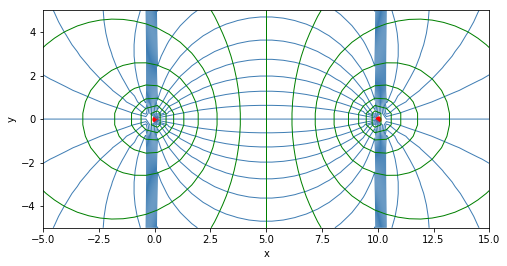

In [59]:
# 2. über die Stromfunktion (und die Potentialfunktion plotten wir auch gleich)
psi_quelle = source_psi(X, Y, 0, 0, 2)
psi_senke = source_psi(X, Y, 10, 0, -2)
psi_gesamt = psi_quelle + psi_senke

phi_quelle = source_phi(X, Y, 0, 0, 2)
phi_senke = source_phi(X, Y, 10, 0, -2)
phi_gesamt = phi_quelle + phi_senke

plt.figure(figsize=(8, 4))
plt.xlabel('x')
plt.ylabel('y')
#plt.streamplot(X, Y, u_gesamt, v_gesamt, 
#                  density=3, linewidth=1, arrowsize=2, arrowstyle='->')
plt.contour(X, Y, psi_gesamt, 20,
            colors='#407eb4', linewidths=1, linestyles='solid');
plt.contour(X, Y, phi_gesamt, 20,
            colors='green', linewidths=1, linestyles='solid');

plt.scatter(0, 0, color='red', s=40, marker='o', linewidth=0)
plt.scatter(10, 0, color='red', s=40, marker='o', linewidth=0);

### Potentialwirbel


### Dipolströmung


---
###### Copyright (c) 2017, Matthias Stripf

Der folgende Python-Code darf ignoriert werden. Er dient nur dazu, die richtige Formatvorlage für die Jupyter-Notebooks zu laden.

In [68]:
from IPython.core.display import HTML
def css_styling():
    styles = open('TFDStyle.css', 'r').read()
    return HTML(styles)
css_styling()